<a href="https://colab.research.google.com/github/kylejwaters/MachineLearning/blob/main/NeuralNetScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a 3-Layer Neural Network From Scratch with numpy

@author: Kyle Waters || Created: 12/08/2018

## We are going to build a simple neural network that predicts the district-level median housing price in districts across the state of California. 

### To start, we are only going to use the location of the district as input, i.e. the latitude and longitude data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import Image, display
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

Let's import the data. It is already split by Google into a training and test set, of sizes 17,000 and 3,000, respectively. The data was originally collected from the 1990 California census, and contains information on the location of the district and basic economic and social statistics like income and population. Ideally, we would like to use all available information, but that will require a more generalized model that works for an arbitrary number of inputs/features.

In [ ]:
test = pd.read_csv('sample_data/california_housing_test.csv')

In [ ]:
train = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
train = train[['longitude', 'latitude', 'median_house_value']]
test = test[['longitude', 'latitude', 'median_house_value']]

Let's see if a quick scatter plot offers any insight. 



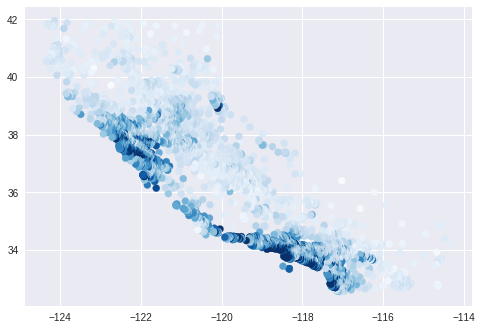

In [ ]:
plt.scatter(train[train.columns[0]],train[train.columns[1]], c=train[train.columns[2]],cmap='Blues') 

The districts with the highest median home values (darker blue) are clustered around the major cities in California - San Francisco and Los Angeles. They also are clustered along the coastline. This sort of spatial autocorrelation should be picked up by a neural network.

Let's define the neural network and our activation function,

In [ ]:
def sigmoid(X):
  ''' The Activation Function '''
  return(1/(1+np.exp(-X)))

In [ ]:
def neural_network(X1, X2, w1, w2, w3, w4, b1, w5, w6, b2):
  ''' Creates a Simple 3 Layer Neural Net '''
  
  #1 Hidden Layers 
  hidden_1 = w1*X1 + w2*X2 + b1 
  hidden_2 = w3*X1 + w4*X2 + b1
  
  #Apply the Activation Function to the outputs of the hidden layer
  net_1 = sigmoid(hidden_1)
  net_2 = sigmoid(hidden_2)
  
  #The one output node
  output = w5*net_1 + w6*net_2 + b2
  
  #Return Output
  return(output)

Here's what the network looks like, (hand drawn by yours truly)

---



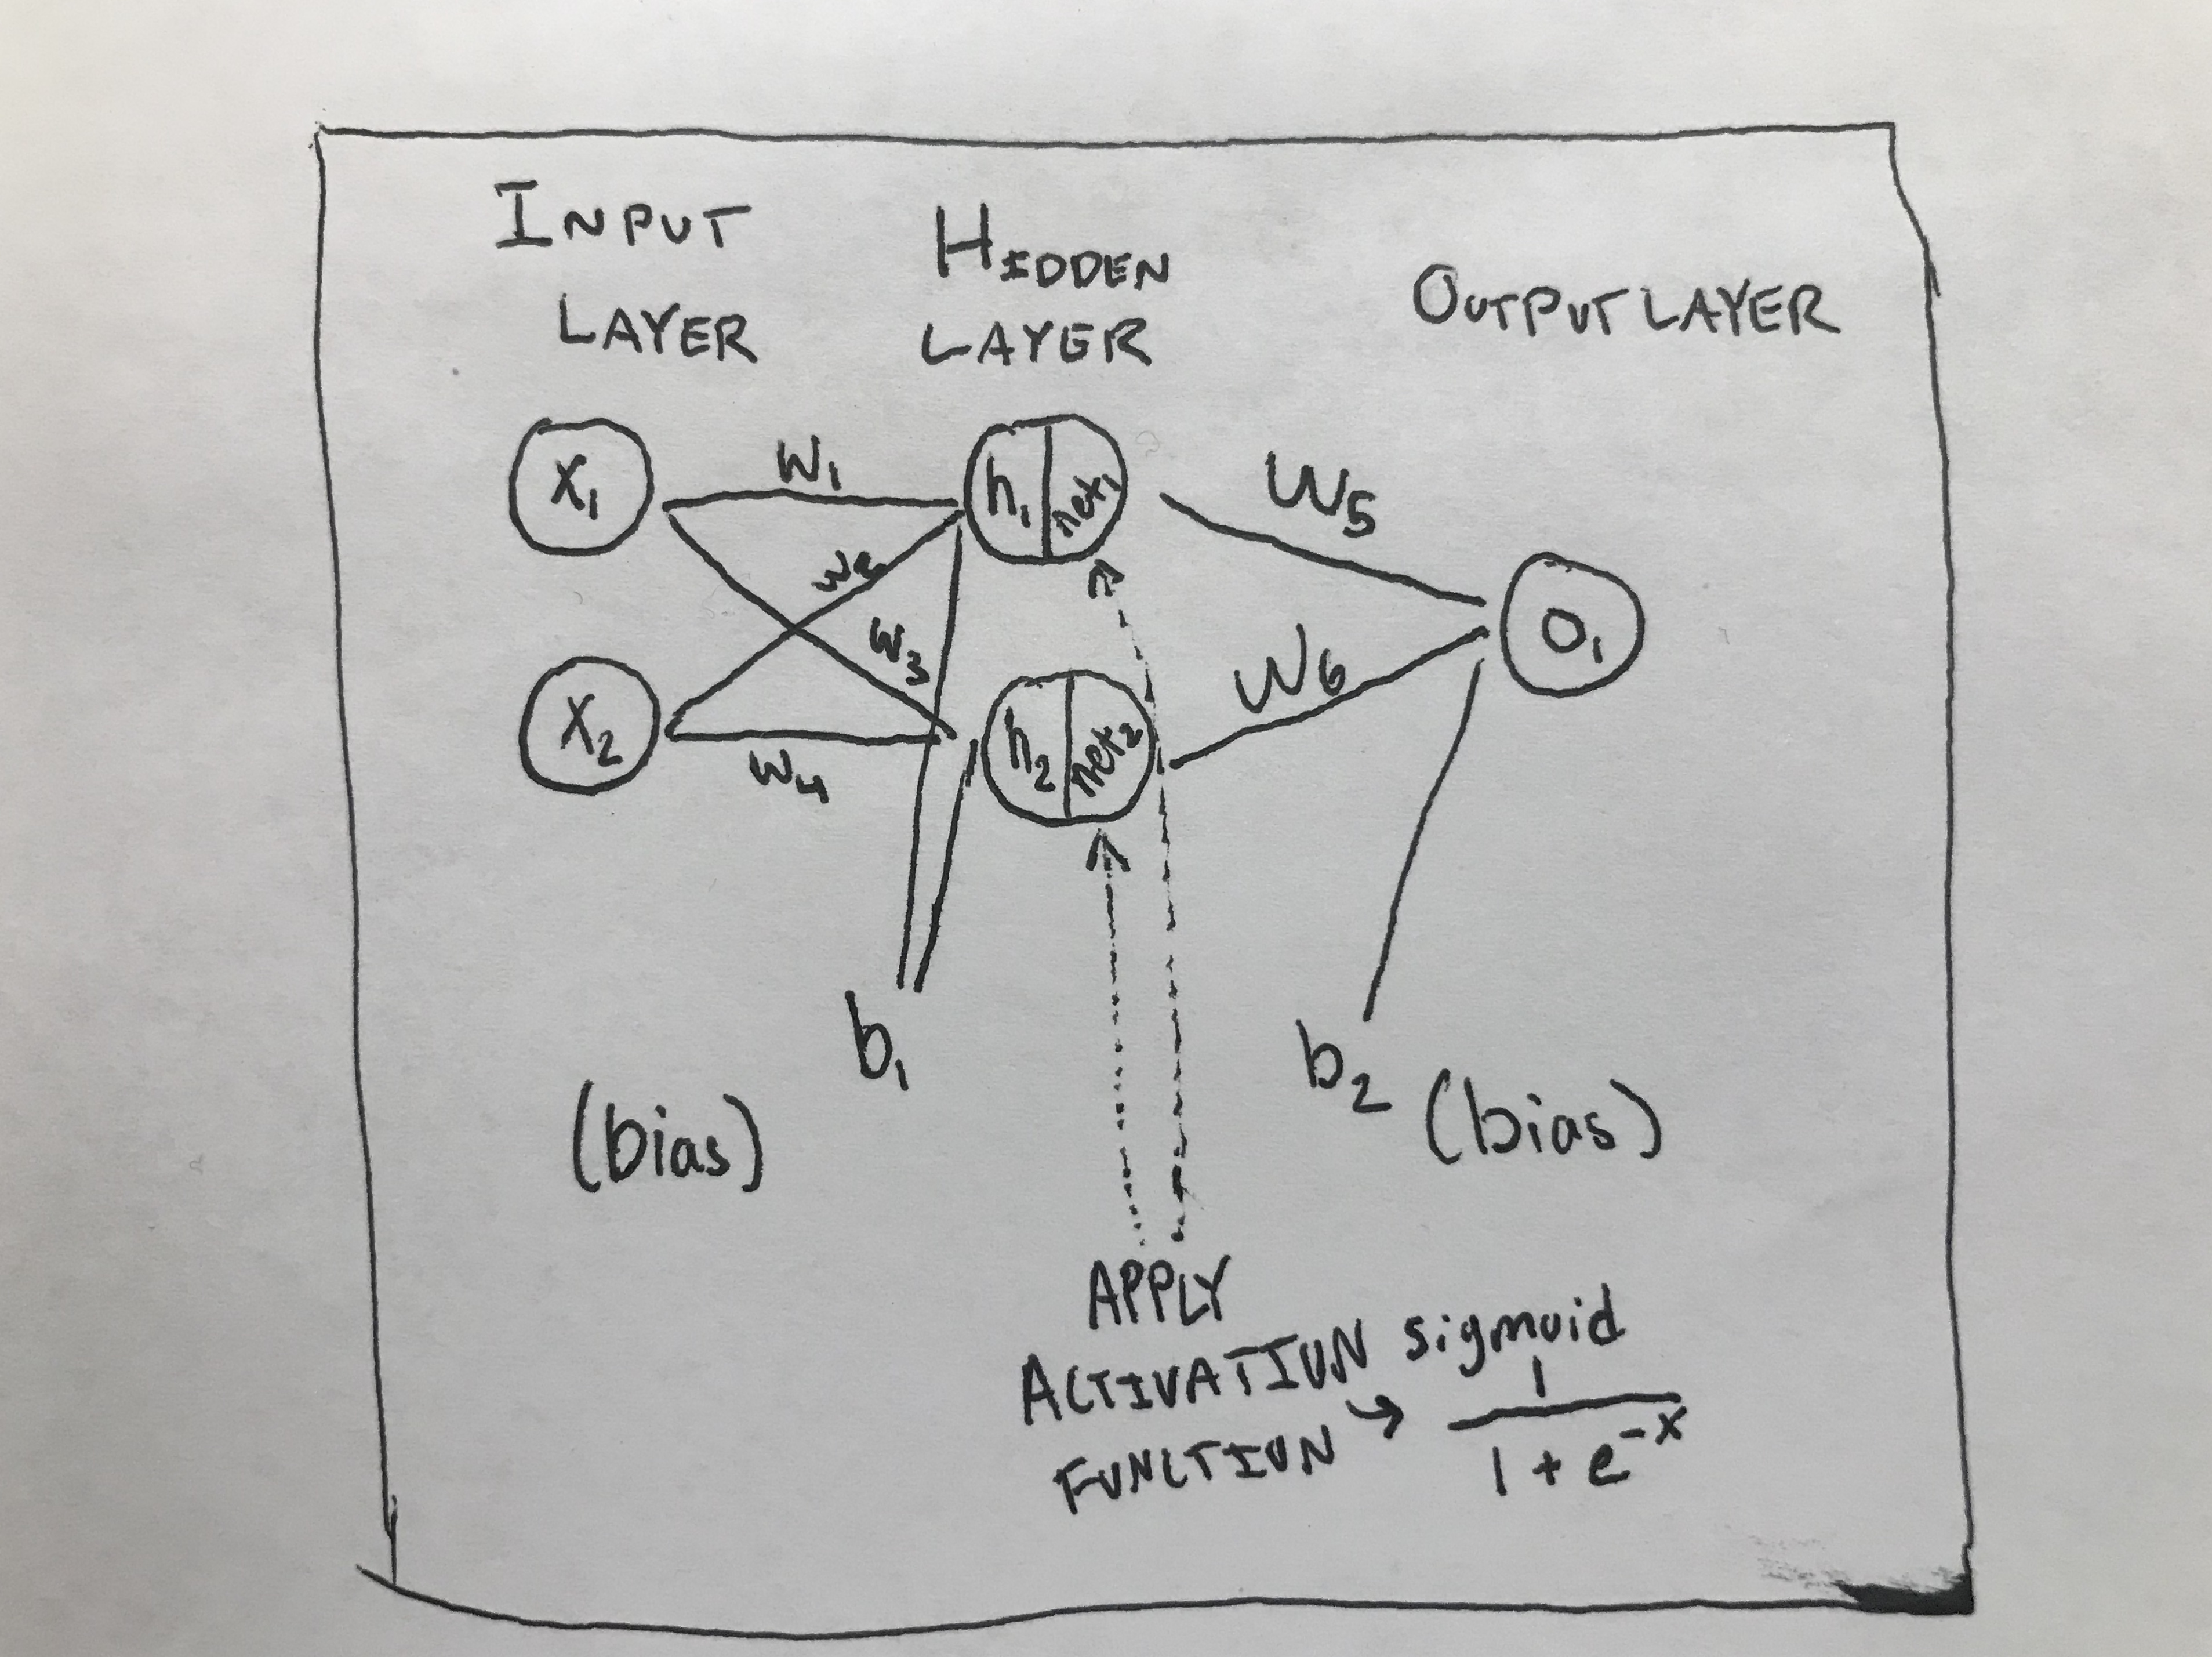

In [ ]:
display(Image('image1.jpeg', unconfined=True, width=800, height=600))

Here we define some functions for computing outputs at individual nodes.

In [ ]:
def hidden_1(X1,X2,w1,w2,b1):
  return(w1*X1 + w2*X2 + b1 )

In [ ]:
def hidden_2(X1,X2,w3,w4,b1):
  return(w3*X1 + w4*X2 + b1 )

In [ ]:
def net_1(X1,X2,w1,w2,b1):
  hidden_1 = w1*X1 + w2*X2 + b1
  return(sigmoid(hidden_1))

In [ ]:
def net_2(X1,X2,w3,w4,b1):
  hidden_2 = w3*X1 + w4*X2 + b1
  return(sigmoid(hidden_2))

Here is our loss function,

In [ ]:
def mean_squared_error(actual, predicted):
  return(np.mean((actual - predicted) ** 2))

And our normalization strategy. We constrain all data between 0 and 1. For example, for each input point $x_{1i}$ we get the constrained value from the following, 

$$ x_{1constrained} = \frac{x_i - minX_1}{maxX_1 - minX_1}$$

In [ ]:
def normalize(array):
  return((array-np.min(array)) / (np.max(array) - np.min(array)))

## Gradient Derivation
### Here we derive the necessary conditions to conduct the backpropagation algorithm for training the network.

### Our loss function is mean squared error which for N training observations is,

$$ MSE = \frac{1}{N}\sum_{i=1}^{N} (Actual_{i} - output_{i}) ^ 2  $$

### For training, we need to find the gradient/partial derivative with respect to each of the weights of the network.

\\
\begin{equation}
\frac{\partial MSE}{\partial w_i}, for\ i=1,..,6
\end{equation}



We also need the partials with respect to the biases. 

\begin{equation}
\frac{\partial MSE}{\partial b_k}, for\ k=1,2
\end{equation}

It is important to note that the gradient calculation is really an estimation problem. In stochastic gradient descent there will be a different gradient for each individual training point. We take a simple average across these gradient calculations to get the value we eventually use to update the weights. So we'll just look at the derivation of the gradient for a single training point, $(x_{1i}, x_{2i}, y_{i})$ Also, $N$ is the batch size here.


** Let's calculate $\frac{\partial MSE}{\partial w_5}$ to start. That's one of the two weights/connections to the output node. **

So we know, $$ Squared Error (SE)_i = \frac{1}{2}(Actual_{i} - output_{1i}) ^ 2  $$ and 
$$ output_{1i} = b_2 + w_5 * net_{1i} + w_6 * net_{2i} $$ 

Using the chain rule, 

$$\frac{\partial SE_i}{\partial w_5} = \frac{\partial SE_i}{\partial output_{1i}} * \frac{\partial output_{1i}}{\partial w_5}$$

The two parts of the partial should be,

$$\frac{\partial SE_i}{\partial output_{1i}} = -(Actual_{i} - output_{1i}) $$

$$ \frac{\partial output_{1i}}{\partial w_5} = net_{1i} $$

So together we get, 

$$\frac{\partial SE_i}{\partial w_5} = -(Actual_{i} - output_{1i})*net_{1i}$$

Next we just take the mean across the individual gradient calculations,
$$ \frac{\partial MSE}{\partial w_5} =  \frac{1}{N}\sum_{i=1}^{N}-(Actual_{i} - output_{1i})*net_{1i}$$ 

and similarly,

$$\frac{\partial SE_i}{\partial w_6} = -(Actual_{i} - output_{1i})*net_{2i}$$
And again we take the mean across the individual gradient calculations,
$$ \frac{\partial MSE}{\partial w_6} =  \frac{1}{N}\sum_{i=1}^{N}-(Actual_{i} - output_{1i})*net_{2i}$$ 
#### Now we need to find the gradients for the weights one layer back in the network. Again by the chain rule,

$$\frac{\partial SE_i}{\partial w_1} = \frac{\partial SE_i}{\partial output_{1i}} * \frac{\partial output_{1i}}{\partial net_{1i}}*\frac{\partial net_{1i}}{\partial hidden_{1i}}*\frac{\partial hidden_{1i}}{\partial w_1}                        $$

**Let's go through each piece one by one.**

We already calculated the first component, 

$$\frac{\partial SE_i}{\partial output_{1i}} = -(Actual_{i} - output_{1i}) $$

Now for the other parts,

$$ \frac{\partial output_{1i}}{\partial net_{1i}} = w_5 $$

Our activation function is the sigmoid function which is, 

$$sigmoid(x) = \frac{1}{1+exp(-x)}$$

Using the convenient fact that the derivative of the sigmoid function is the sigmoid function times one minus itself we get,

$$ \frac{\partial net_{1i}}{\partial hidden_{1i}} = sigmoid(hidden_{1i})*(1-sigmoid(hidden_{1i})) $$

The partial of the hidden node wrt the weight is just the input.

$$ \frac{\partial hidden_{1i}}{\partial w_1} = x_{1i} $$

So putting this all together, 

$$\frac{\partial SE_i}{\partial w_1} = -(Actual_{i} - output_{1i}) * w_5 * sigmoid(hidden_{1i})*(1-sigmoid(hidden_{1i})) * x_{1i} $$

$$\frac{\partial MSE}{\partial w_1} = \frac{1}{N}\sum_{i=1}^{N}-(Actual_{i} - output_{1i}) * w_5 * sigmoid(hidden_{1i})*(1-sigmoid(hidden_{1i})) * x_{1i} $$

and similarly, 

$$\frac{\partial MSE}{\partial w_2} = \frac{1}{N}\sum_{i=1}^{N} -(Actual_{i} - output_{i}) * w_5 * sigmoid(hidden_{1i})*(1-sigmoid(hidden_{1i})) * x_{2i} $$

$$\frac{\partial MSE}{\partial w_3} = \frac{1}{N}\sum_{i=1}^{N} -(Actual_{i} - output_{i}) * w_6 * sigmoid(hidden_{2i})*(1-sigmoid(hidden_{2i})) * x_{1i} $$

$$\frac{\partial MSE}{\partial w_4} = \frac{1}{N}\sum_{i=1}^{N} -(Actual_{i} - output_{i}) * w_6 *sigmoid(hidden_{2i})*(1-sigmoid(hidden_{2i})) * x_{2i} $$

** Finally, we just need the gradients for the biases, $b_1$ and $b_2$. **

$$\frac{\partial SE_i}{\partial b_2} = \frac{\partial SE_i}{\partial output_{1i}}*\frac{\partial output_{1i}}{\partial b_2}$$

Using what we already found from above,

$$\frac{\partial MSE}{\partial b_2} = \frac{1}{N}\sum_{i=1}^{N} -(Actual_{i} - output_{i})$$

The gradient of the first bias $b_1$ is a little more involved,

$$\frac{\partial SE_i}{\partial b_1} = \frac{\partial SE_i}{\partial output_{1i}}*\frac{\partial output_{1i}}{\partial net_i}*\frac{\partial net_i}{\partial hidden_i}*\frac{\partial hidden_i}{\partial b_1}$$

$$\frac{\partial SE_i}{\partial b_1} = \frac{\partial SE_i}{\partial output_{1i}}*(\frac{\partial output_{1i}}{\partial net_{1i}}*\frac{\partial net_{1i}}{\partial hidden_{1i}}*\frac{\partial hidden_{1i}}{\partial b_1} + \frac{\partial output_{1i}}{\partial net_{2i}}*\frac{\partial net_{2i}}{\partial hidden_{2i}}*\frac{\partial hidden_{2i}}{\partial b_1})$$

Expanding everything out in the loss function, 
$$MSE = \frac{1}{N}\sum_{i=1}^{N} (Actual_{i} - (b_2 + w_5*net_1 + w_6*net_2)) ^ 2$$

$$MSE = \frac{1}{N}\sum_{i=1}^{N} (Actual_{i} - (b_2 + w_5*(\frac{1}{1+exp(-hidden_1)}) + w_6*(\frac{1}{1+exp(-hidden_2)}))) ^ 2$$

$$MSE = \frac{1}{N}\sum_{i=1}^{N} (Actual_{i} - (b_2 + w_5*(\frac{1}{1+exp(-(b_1 + w_1*X_1 + w_2*X_2))}) + w_6*(\frac{1}{1+exp(-(b_1 + w_3*X_1 + w_4*X_2))}))) ^ 2$$

Now we can see the role $b_1$ plays in the loss function. Breaking up the partial calculation we get,


$$\frac{\partial output_{1i}}{\partial net_{1i}}*\frac{\partial net_{1i}}{\partial hidden_{1i}}*\frac{\partial hidden_{1i}}{\partial b_1} = w_5 * sigmoid(hidden_{1i})*(1-sigmoid(hidden_{1i}))*1$$

and,

$$\frac{\partial output_{1i}}{\partial net_{2i}}*\frac{\partial net_{2i}}{\partial hidden_{2i}}*\frac{\partial hidden_{2i}}{\partial b_1} = w_6 * sigmoid(hidden_{2i})*(1-sigmoid(hidden_{2i})) *1$$


Putting all of these together, 

$$\frac{\partial MSE}{\partial b_1} = \frac{1}{N}\sum_{i=1}^{N} -(Actual_{i} - Output_{1i})*(w_5 * sigmoid(hidden_{1i})*(1-sigmoid(hidden_{1i})+  w_6 * sigmoid(hidden_{2i})*(1-sigmoid(hidden_{2i}))$$

To optimize the weights/biases, we update them in the direction of the gradient. See page 278 of Goodfellow's *Deep Learning*.

In [ ]:
def update_weights(y, preds, X1, X2, learning_rate, w1, w2, w3, w4, w5, w6, b1, b2):
  #3 Calculate Gradients and then Update Weights
  d_loss_d_w1 = np.mean(-(y-preds)*w5*sigmoid(hidden_1(X1,X2,w1,w2,b1))*(1-sigmoid(hidden_1(X1,X2,w1,w2,b1)))*X1)
  d_loss_d_w2 = np.mean(-(y-preds)*w5*sigmoid(hidden_1(X1,X2,w1,w2,b1))*(1-sigmoid(hidden_1(X1,X2,w1,w2,b1)))*X2)
  d_loss_d_w3 = np.mean(-(y-preds)*w6*sigmoid(hidden_2(X1,X2,w1,w2,b1))*(1-sigmoid(hidden_2(X1,X2,w1,w2,b1)))*X1)
  d_loss_d_w4 = np.mean(-(y-preds)*w6*sigmoid(hidden_2(X1,X2,w1,w2,b1))*(1-sigmoid(hidden_2(X1,X2,w1,w2,b1)))*X2)
  
  d_loss_d_w5 = np.mean(-(y-preds)*net_1(X1,X2,w1,w2,b1))
  d_loss_d_w6 = np.mean(-(y-preds)*net_2(X1,X2,w3,w4,b1))
  
  d_loss_d_b1 = np.mean(-(y-preds)*(w5*sigmoid(hidden_1(X1,X2,w1,w2,b1))*(1-sigmoid(hidden_1(X1,X2,w1,w2,b1))) + w6*sigmoid(hidden_2(X1,X2,w1,w2,b1))*(1-sigmoid(hidden_2(X1,X2,w1,w2,b1)))))
  d_loss_d_b2 = np.mean(-(y-preds))
  
  #Update Weights
  
  
  print('The gradients are,')
  print("Wrt w1: {}".format(d_loss_d_w1))
  print("Wrt w2: {}".format(d_loss_d_w2))
  print("Wrt w3: {}".format(d_loss_d_w3))
  print("Wrt w4: {}".format(d_loss_d_w4))
  print("Wrt w5: {}".format(d_loss_d_w5))
  print("Wrt w6: {}".format(d_loss_d_w6))
  print("Wrt b1: {}".format(d_loss_d_b1))
  print("Wrt b2: {}".format(d_loss_d_b2))
  
  
  print("----------------------------------------------------")
  print("old w1 is {}".format(w1))
  w1 = w1 - learning_rate * d_loss_d_w1
  print("new w1 is {}".format(w1))
  
  print("old w2 is {}".format(w2))
  w2 = w2 - learning_rate * d_loss_d_w2
  print("new w2 is {}".format(w2))
  
  print("old w3 is {}".format(w3))
  w3 = w3 - learning_rate * d_loss_d_w3
  print("new w3 is {}".format(w3))
  
  print("old w4 is {}".format(w4))
  w4 = w4 - learning_rate * d_loss_d_w4
  print("new w4 is {}".format(w4))
  
  print("old w5 is {}".format(w5))
  w5 = w5 - learning_rate * d_loss_d_w5
  print("new w5 is {}".format(w5))
  
  print("old w6 is {}".format(w6))
  w6 = w6 - learning_rate * d_loss_d_w6
  print("new w6 is {}".format(w6))
  
  print("old b1 is {}".format(b1))
  b1 = b1 - learning_rate * d_loss_d_b1
  print("new b1 is {}".format(b1))
  
  print("old b2 is {}".format(b2))
  b2 = b2 - learning_rate * d_loss_d_b2
  print("new b2 is {}".format(b2))
  print("----------------------------------------------------")
  
  
  #Return the updated Weights
  return(w1, w2, w3, w4, w5, w6, b1, b2)

In [ ]:
def stochastic_gradient_descent(entire_dataset, learning_rate, batch_size, epochs):
  ''' Perform backpropagation to train the network and return the weights of the network'''
  
  ###  Arguments of the Function  ###
    # entire_dataset is the whole training dataset
    # learning_rate is the size of the step we take in each iteration to update the weights, higher learning rate = faster training
    # batch_size is the size of the sample of the entire dataset we take at each iteration of the loop to update the weights of the network
    # Epochs is the number of iterations through the entire training set
 
  
  loops_one_epoch = round(len(entire_dataset) / batch_size)
  loops_total = loops_one_epoch * epochs
  print("There will be {} loops total".format(loops_total))
  training_losses = []
  
  #1 Initialize the weights/biases, initialization standard normal dist
  initial_values = [np.random.normal(0, 1) for param in range(8)]
  w1 = initial_values[0]
  w2 = initial_values[1]
  w3 = initial_values[2]
  w4 = initial_values[3]
  w5 = initial_values[4]
  w6 = initial_values[5]
  b1 = initial_values[6]
  b2 = initial_values[7]
   
  #2 Forward Pass, initialized weights/biases, numpy arrays
  
  batch = entire_dataset.sample(batch_size)
  X1_batch = batch['longitude'].values
  X2_batch = batch['latitude'].values
  
  #Normalize the data to make training easier
  X1_batch = normalize(X1_batch)
  X2_batch = normalize(X2_batch)
  
  #Target/Actual values, take log of target
  y_batch = np.log(batch['median_house_value'].values)
  
  preds = neural_network(X1_batch, X2_batch, w1, w2, w3, w4, b1, w5, w6, b2)
  loss = mean_squared_error(y_batch, preds)
  training_losses.append(loss)
  
  '''
  print("----------------------------------------------------")
  print("Let's See what is going on under the hood here...")
  print("The actual values are {:.5} and {:.5}".format(y_batch[0],y_batch[1]))
  print("The output values are {:.5} and {:.5}".format(preds[0],preds[1]))
  print("This means we should have a mean squared error of {}".format(0.5 * ( ((y_batch[0] - preds[0]) ** 2) + ((y_batch[1] - preds[1]) ** 2))))
  print("----------------------------------------------------")
  '''
  
  #3 Calculate Gradients and then Update Weights, obtain minimum
  
  iterat = 0
  while True:
    
    #Take a random sample of the entire dataset of size = batch_size
    batch = entire_dataset.sample(batch_size)
    X1_batch = batch['longitude'].values
    X2_batch = batch['latitude'].values
    
    #Normalize the data to make training easier
    X1_batch = normalize(X1_batch)
    X2_batch = normalize(X2_batch)

    y_batch = np.log(batch['median_house_value'].values)
    
    iterat += 1
    loss_prev = loss
    print('Our previous MSE was {:.8}'.format(loss_prev))
    #backprop
    w1, w2, w3, w4, w5, w6, b1, b2 = update_weights(y_batch, preds, X1_batch, X2_batch, learning_rate, w1, w2, w3, w4, w5, w6, b1, b2)
    
    #Conduct forward pass
    preds = neural_network(X1_batch, X2_batch, w1, w2, w3, w4, b1, w5, w6, b2)
    loss = mean_squared_error(y_batch, preds)
    print('Our new MSE is {:.8}'.format(loss))
    training_losses.append(loss)
    
    if iterat == loops_total:
      break
    else:
      continue
  
  #Return the loss and weights for the network
  return(training_losses, w1, w2, w3, w4, w5, w6, b1, b2)

In [ ]:
training_losses, w1, w2, w3, w4, w5, w6, b1, b2 = stochastic_gradient_descent(train, .15, 200, 1)

# Model Evaluation

### Let's see how the model performs on the test set

In [ ]:
X1_test = test.longitude.values
X2_test = test.latitude.values

#Standardize the data to make training easier
X1_test = normalize(X1_test)
X2_test = normalize(X2_test)

y_test = np.log(test.median_house_value.values)

In [ ]:
test_preds = neural_network(X1_test, X2_test, w1, w2, w3, w4, b1, w5, w6, b2)

In [ ]:
print("The mean absolute error is {:.9}".format(mean_absolute_error(test.median_house_value.values, np.exp(test_preds))))
print("If we naively predicted each district in the test set as the average of the training set, would this be better than the neural net?")
print("The mean absolute error for that approach is {:.9}".format(mean_absolute_error(test.median_house_value.values, np.array([np.mean(train.median_house_value.values) for i in range(len(test))]))))
if mean_absolute_error(test.median_house_value.values, np.exp(test_preds)) < mean_absolute_error(test.median_house_value.values, np.array([np.mean(train.median_house_value.values) for i in range(len(test))])):
  print("The Neural Net is better than the naive approach!")
else:
  print("The model doesn't add too much in terms of predictive power")

The mean absolute error is 87990.816
If we naively predicted each district in the test set as the average of the training set, would this be better than the neural net?
The mean absolute error for that approach is 89731.0477
The Neural Net is better than the naive approach!


In [ ]:
mean_absolute_error(np.log(test.median_house_value.values), test_preds)

0.45947395211360126

## Are the errors clustered in Any Way?

### Let's plot the predictions

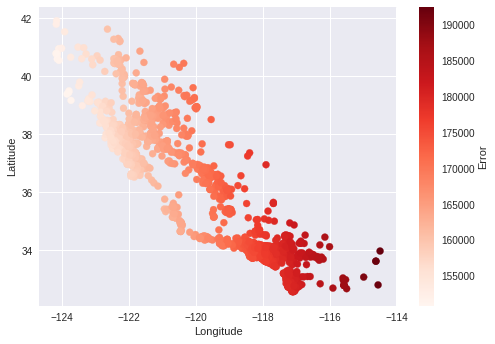

In [ ]:
plt.scatter(test.longitude, test.latitude, c=np.abs((y_test - np.exp(test_preds))), cmap='Reds' )
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar= plt.colorbar()
cbar.set_label("Error")
plt.show()

### The errors are indeed clustered. There seems to be a lot of overfitting. Here are the actual values from the test set

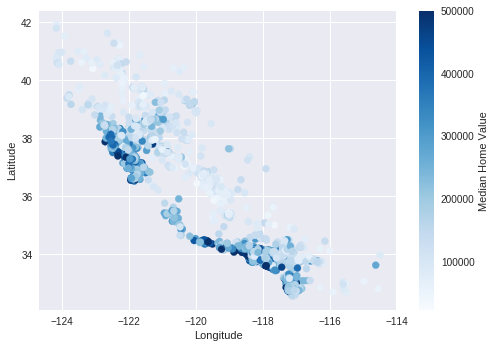

In [ ]:
plt.scatter(test.longitude, test.latitude, c=(test.median_house_value.values), cmap='Blues' )
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar= plt.colorbar()
cbar.set_label("Median Home Value")
plt.show()

## Would a Random Forest do any better?

In [ ]:
forest = RandomForestRegressor()
forest.fit(train[train.columns[:2]], train[train.columns[2:]])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
forest_preds = forest.predict(test[test.columns[:2]])

In [ ]:
print("The mean absolute error with the random forest is {:.9}".format(mean_absolute_error(test.median_house_value.values, forest_preds)))

The mean absolute error with the random forest is 33008.7865


## The random forest does a lot lot better in this case

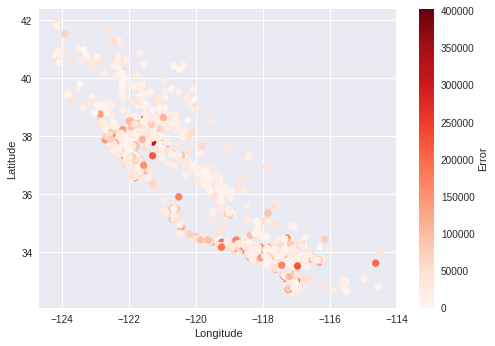

In [ ]:
plt.scatter(test.longitude, test.latitude, c=np.abs((test.median_house_value.values - forest_preds)), cmap='Reds' )
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar= plt.colorbar()
cbar.set_label("Error")
plt.show()

## Analyzing the Training Error in the Neural Network

### How is the training error impacted by the learning rate? 

In [ ]:
training_losses_05, w1, w2, w3, w4, w5, w6, b1, b2 = stochastic_gradient_descent(train, .05, 200, 2)
training_losses_10, w1, w2, w3, w4, w5, w6, b1, b2 = stochastic_gradient_descent(train, .10, 200, 2)

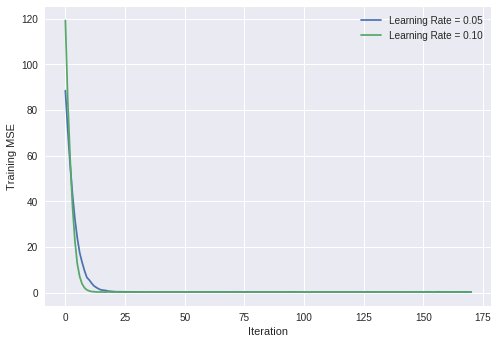

In [ ]:
plt.plot(range(171), training_losses_05, label='Learning Rate = 0.05')
plt.plot(range(171), training_losses_10, label='Learning Rate = 0.10')
plt.xlabel("Iteration")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

As expected, the training error falls quicker with a higher learning rate because we are updating the weights by larger amounts after each iteration/gradient calculation.  

# Conclusion

### Clearly, we are omitting informative variables that would help with the prediction task. Location alone is not sufficient. An extension would be to create a 3-layer network with an arbitrary number of input nodes. A more difficult task would be creating an arbitrary network with *both* an arbitrary number of input nodes and hidden layers. A deeper network, along with more features, would help yield better predictions and performance. 
